# Dùng linear regression với file dữ liệu có được sử dụng cách 1

In [38]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [39]:
df = pd.read_csv('DataSource/ModifiedData/C1_PollutionsDataset.csv')


In [40]:
# Display the first few rows of the dataframe
print(df.head())


   Index  max  median  variance  UV_Index  DO mgO2/l  Na(mg/l)  SO4 (mg/l)  \
0      1   44    18.0    929.39  37.81908       8.41    10.200       6.142   
1      2    5     4.0     10.43   6.85320       4.25     9.400      11.564   
2      3   89    57.0   1196.23   0.00000       4.17     9.666       8.953   
3      4   27     6.9    323.32  21.76508       4.77     8.739      11.138   
4      5   21     0.2    321.15   0.00000       4.58     8.630       8.019   

   classification  
0               1  
1               1  
2               1  
3               1  
4               1  


In [41]:
# Check the data types and missing values
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 434 entries, 0 to 433
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Index           434 non-null    int64  
 1   max             434 non-null    int64  
 2   median          434 non-null    float64
 3   variance        434 non-null    float64
 4   UV_Index        432 non-null    float64
 5   DO mgO2/l       434 non-null    float64
 6   Na(mg/l)        434 non-null    float64
 7   SO4 (mg/l)      434 non-null    float64
 8   classification  434 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 30.6 KB
None


In [42]:
# Summary statistics
print(df.describe())

            Index         max      median      variance    UV_Index  \
count  434.000000  434.000000  434.000000    434.000000  432.000000   
mean   217.500000   55.543779   28.157834   3346.525069    6.419691   
std    125.429263   60.490292   39.958946   7120.188158   10.212952   
min      1.000000    2.000000    0.100000      0.000000    0.000000   
25%    109.250000   14.250000    4.000000    133.695000    0.000000   
50%    217.500000   28.000000    9.000000    401.505000    0.311303   
75%    325.750000   73.500000   33.000000   2068.297500    9.524640   
max    434.000000  259.000000  193.000000  82541.400000   43.396400   

        DO mgO2/l     Na(mg/l)   SO4 (mg/l)  classification  
count  434.000000   434.000000   434.000000      434.000000  
mean     3.208753    92.910161    34.219117        1.267281  
std      1.447042   383.380024   131.337080        0.510842  
min      0.250000     1.636000     1.063000        0.000000  
25%      1.972500     5.121750     6.503000       

#### visualization

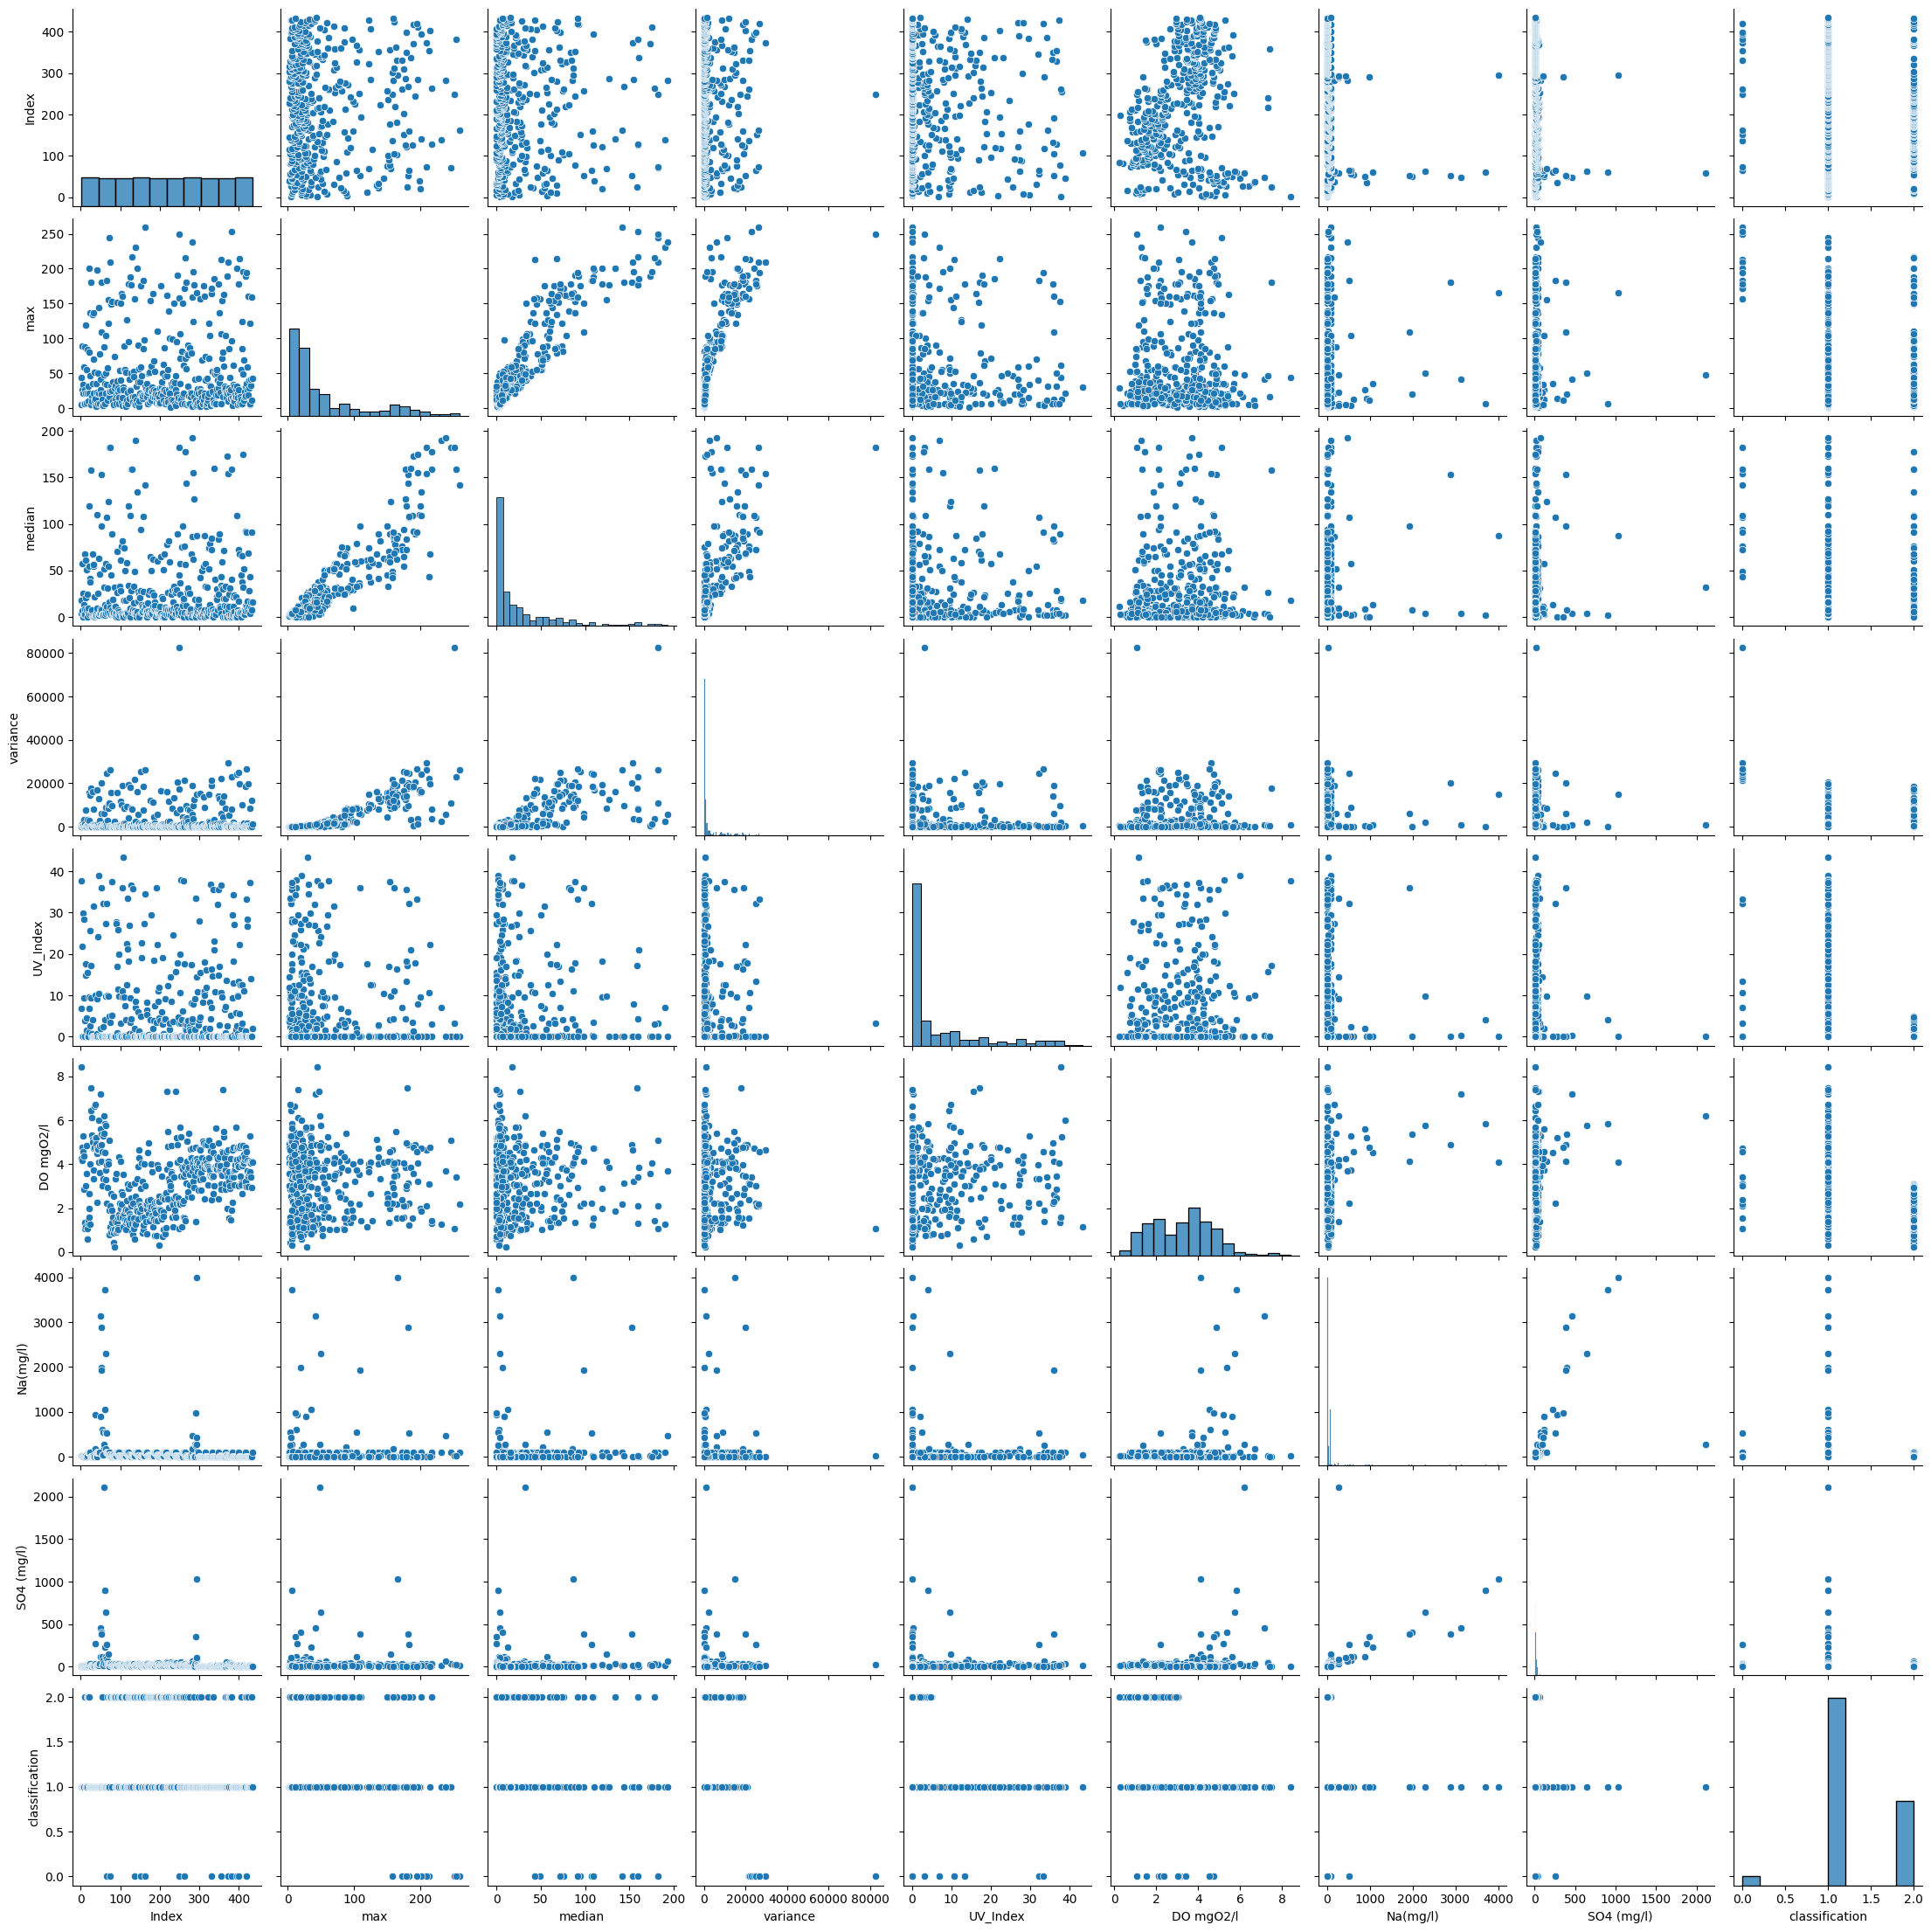

In [43]:
sns.pairplot(df)  # Pairwise relationships
plt.show()

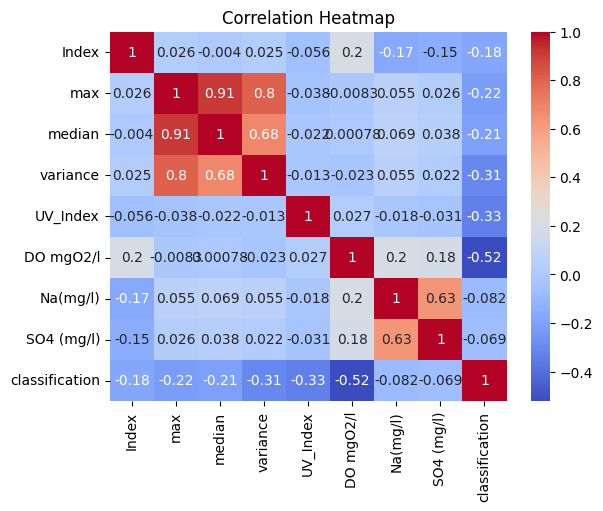

In [44]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')  # Correlation heatmap
plt.title('Correlation Heatmap')
plt.show()

#### Handle missing data

In [45]:
# Check for missing values
print(df.isnull().sum())

# Handle missing values (example: impute with mean)
df.fillna(df.mean(), inplace=True)

Index             0
max               0
median            0
variance          0
UV_Index          2
DO mgO2/l         0
Na(mg/l)          0
SO4 (mg/l)        0
classification    0
dtype: int64


#### Using linear regression

In [46]:
X = df[['max', 'median', 'variance', 'UV_Index', 'DO mgO2/l', 'Na(mg/l)', 'SO4 (mg/l)']]  # Features
y = df['classification']

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
model = LinearRegression()

# Fit the model
model.fit(X_train, y_train)

LinearRegression()

#### Evaluate the metrics

In [49]:
y_pred = model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R2 Score): {r2}')

Mean Squared Error (MSE): 0.18823036146158398
Mean Absolute Error (MAE): 0.32723775196100646
R-squared (R2 Score): 0.2648526285331637


# Dùng linear regression với file dữ liệu có được sử dụng cách 2

In [50]:
df2 = pd.read_csv('DataSource/ModifiedData/C2_PollutionsDataset.csv')

In [51]:
# Display the first few rows of the dataframe
print(df2.head())

   Index  max  median  variance  UV_Index  DO mgO2/l  Na(mg/l)  SO4 (mg/l)  \
0      1   44    18.0    929.39  37.81908       8.41    10.200       6.142   
1      2    5     4.0     10.43   6.85320       4.25     9.400      11.564   
2      3   89    57.0   1196.23   0.00000       4.17     9.666       8.953   
3      4   27     6.9    323.32  21.76508       4.77     8.739      11.138   
4      5   21     0.2    321.15   0.00000       4.58     8.630       8.019   

   classification  
0               1  
1               1  
2               1  
3               1  
4               1  


In [52]:
# Check the data types and missing values
print(df2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 434 entries, 0 to 433
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Index           434 non-null    int64  
 1   max             434 non-null    int64  
 2   median          434 non-null    float64
 3   variance        434 non-null    float64
 4   UV_Index        434 non-null    float64
 5   DO mgO2/l       434 non-null    float64
 6   Na(mg/l)        434 non-null    float64
 7   SO4 (mg/l)      434 non-null    float64
 8   classification  434 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 30.6 KB
None


In [53]:
# Summary statistics
print(df2.describe())

            Index         max      median      variance    UV_Index  \
count  434.000000  434.000000  434.000000    434.000000  434.000000   
mean   217.500000   55.543779   28.157834   3346.525069    6.391541   
std    125.429263   60.490292   39.958946   7120.188158   10.197753   
min      1.000000    2.000000    0.100000      0.000000    0.000000   
25%    109.250000   14.250000    4.000000    133.695000    0.000000   
50%    217.500000   28.000000    9.000000    401.505000    0.311303   
75%    325.750000   73.500000   33.000000   2068.297500    9.493850   
max    434.000000  259.000000  193.000000  82541.400000   43.396400   

        DO mgO2/l     Na(mg/l)   SO4 (mg/l)  classification  
count  434.000000   434.000000   434.000000      434.000000  
mean     3.208753    92.910161    34.219117        0.845622  
std      1.447042   383.380024   131.337080        0.409632  
min      0.250000     1.636000     1.063000        0.000000  
25%      1.972500     5.121750     6.503000       

#### Data Visualization

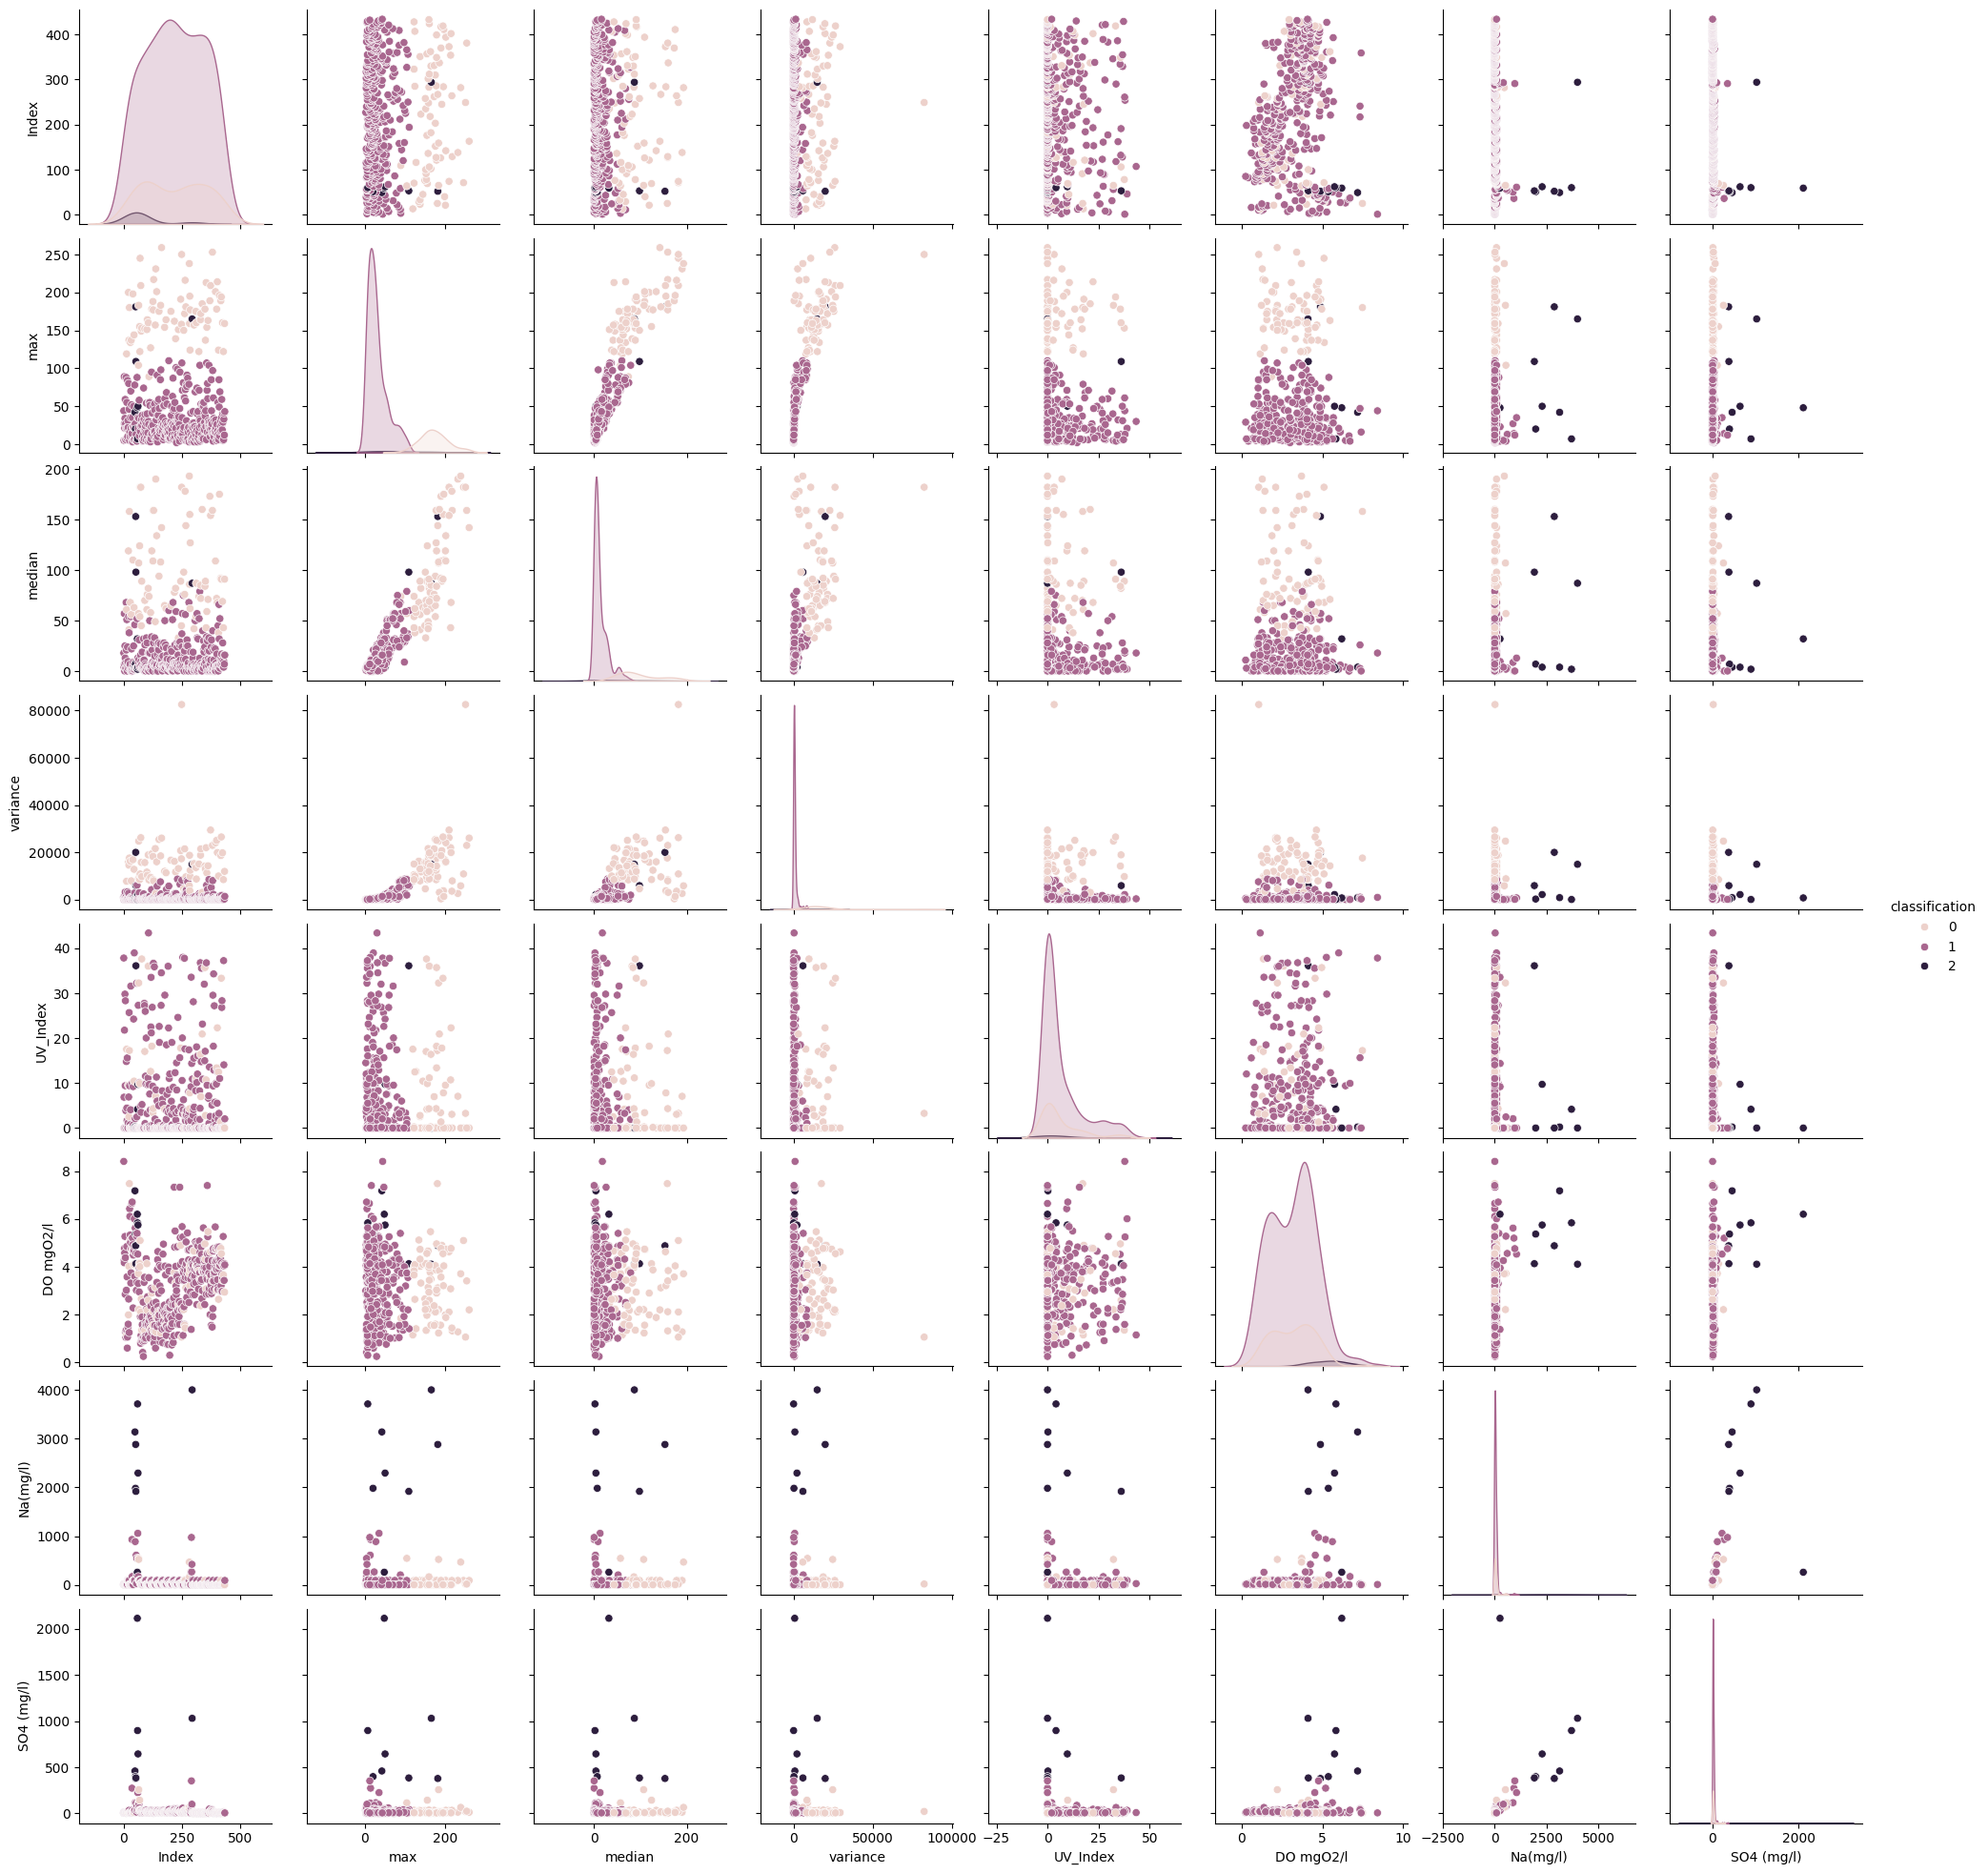

In [54]:
# Pairplot to visualize relationships
sns.pairplot(df2, hue='classification') 
plt.show()

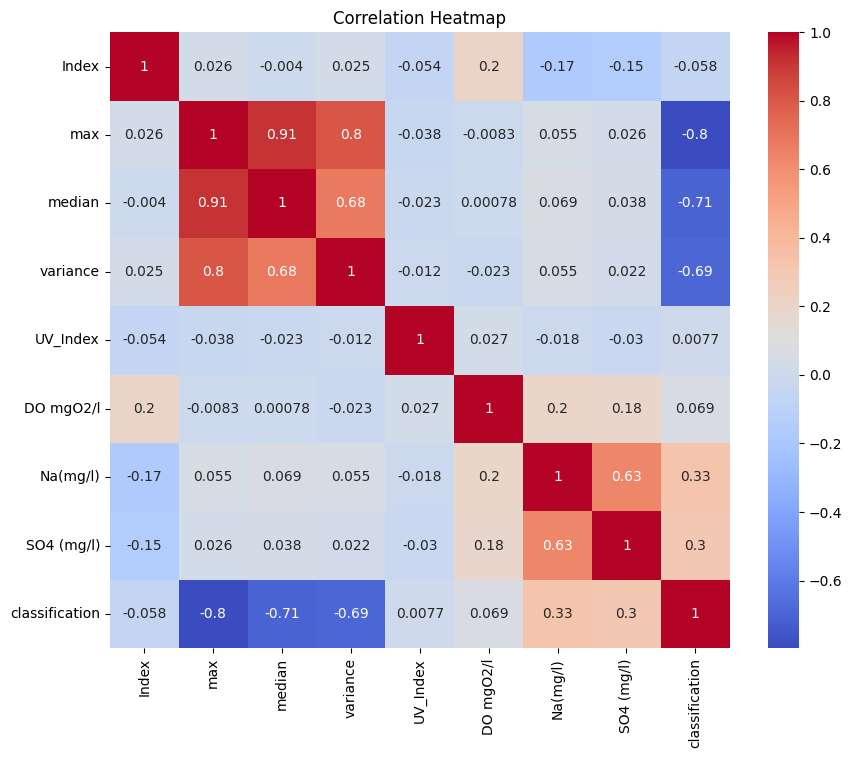

In [60]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df2.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

#### Handling Missing Data

In [61]:
# Check for missing values
print(df2.isnull().sum())

Index             0
max               0
median            0
variance          0
UV_Index          0
DO mgO2/l         0
Na(mg/l)          0
SO4 (mg/l)        0
classification    0
dtype: int64


#### Linear Regression

In [62]:
X2 = df2[['max', 'median', 'variance', 'UV_Index', 'DO mgO2/l', 'Na(mg/l)', 'SO4 (mg/l)']]  
y2 = df2['classification'] 
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

In [63]:
# Initialize the model
model = LinearRegression()

# Fit the model
model.fit(X2_train, y2_train)

LinearRegression()

In [64]:
# Predict on the test data
y2_pred = model.predict(X2_test)

# Calculate metrics
mse = mean_squared_error(y2_test, y2_pred)
mae = mean_absolute_error(y2_test, y2_pred)
r2 = r2_score(y2_test, y2_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R2 Score): {r2}')

Mean Squared Error (MSE): 0.03072542205768163
Mean Absolute Error (MAE): 0.12791270595699367
R-squared (R2 Score): 0.8373701261855999
